<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Bank Customers
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    وقتی اسم مشتریان بانک را می‌شنویم، شاید اولین گزینه‌ای که به ذهنمان می‌رسد همان افرادی هستند که پشت باجه‌ها صف‌های طولانی تشکیل می‌دهند؛ پس طبیعتا اگر بخواهیم با استفاده یادگیری ماشین کمکی به آن‌ها بکنیم، اولین ایده این است که پیشبینی کنیم در چه زمانی به بانک مراجعه کنند که زمان کمتری در صف منتظر بمانند!
    <br>
     اما در این تمرین از طرف بانک مامور شده‌ایم تا با تحلیل پویش‌های بازاریابی (Marketing Campaign) بانک، تخمین بزنیم در پویش‌های پیشِ رو، چه افرادی ممکن است به پویش پاسخ مثبت بدهند.
    <br>
    با سرمایه‌گذاری روی افرادی که احتمال سپرده‌گذاری آن‌ها بیشتر است، بانک می‌توان پول بیشتری را در گاوصندوق‌های خود ذخیره کند و از این طریق رتبه خود را افزایش دهد و بتواند خدمات بیشتری برای مشتریان خود ارائه کند.
    <br>
   در این تمرین اطلاعات کمپین (پویش)‌های پیشین یک بانک پرتغالی را در اختیار داریم و قصد داریم افرادی را شناسایی کنیم که به پویش فعلی پاسخ مثبت می‌هند. هدف این پویش، ایجاد «سپرده مدت دار بانکی» است.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 
import warnings
warnings.filterwarnings('ignore')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    با مجموعه داده این تمرین، در تمرین «بازاریابی بانکی» از فصل مهندسی ویژگی آشنا شده‌ایم.
    <br>
در این تمرین، مانند تمرین‌های پیشین دو مجموعه‌داده در اختیار شما قرار می‌گیرد که یکی مربوط به مجموعه آموزش و دیگری مجموعه آزمون است. 
    <br>
    در مجموعه آموزش، ۳۹۱۸۸ سطر و ۲۱ ستون وجود دارد که در جدول زیر، توضیحات ستون‌ها را با هم مرور می‌کنیم.
    <br>
    طبیعی است که مجموعه آزمون، ستون متغیرهدف را نداشته باشد و با مجموعا ۲۰ ستون در اختیار شما قرار بگیرد!
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|age|ستونی دارای مقادیر عددی که سن مشتری را نشان می‌دهد|
|job|ستونی با مقادیر دسته‌ای که وضعیت شغلی مشتری را نشان می‌دهد|
|marital|این ستون که مقادیر دسته‌ای را می‌پذیرد، وضعیت تاهل مشتری را مدل کرده است|
|education|وضعیت تحصیلی مشتری را به شکل دسته‌ای، نشان می‌دهد|
|default|نشان می‌دهد که آیا به صورت پیشفرض، مشتری اعتبار بانکی دارد یا خیر|
|housing|آیا مشتری برای مسکن، وتم گرفته است یا خیر|
|loan|آیا مشتری وام شخصی دریافت کرده است یا خیر؟|
|contact|نحوه ارتباط با مشتری را نشان می‌دهد. این ستون یکی از دو مقدار *cellular* و *telephone* را می‌تواند اختیار کند. به این معنی که بانک با تلفن همراه مشتری تماس گرفته است یا تلفن ثابت|
|month|این ستون دسته‌ای، نشان می‌دهد آخرین باری که با مشتری تماس گرفته شده است، در چه ماهی بوده است|
|day_of_week|روزی که آخرین تماس با مشتری گرفته شده است، چه روزی بوده است؟ (شنبه، یکشنبه، ...، جمعه)|
|campaign|تعداد تماس‌هایی که تا به حال با مشتری برای کمپین جاری گرفته شده است|
|pdays|تعداد روزی که از آخرین تماس با مشتری برای کمپین قبلی می‌گذرد. عدد ۹۹۹ به این معنی است که قبلا با مشتری تماس گرفته نشده است|
|previous|تعداد تماس‌هایی که با مشتری برای کمپین‌های قبلی گرفته شده است|
|poutcome|نتیجه کمپین‌های قبلی برای مشتری|
|emp.var.rate|نرخ تغییرات اشتغال در بازه سه ماهه|
|cons.price.idx|شاخص قیمت مصرف‌کننده در بازه یک ماهه|
|cons.conf.idx|شاخص اعتماد مصرف‌کننده در بازه یک ماهه|
|euribor3m|نرخ بهره بانکی برای وام‌های بین بانکی اروپایی|
|nr.employed|تعداد کارمندان در بازه سه ماهه|
|y|آیا فرد به پویش سرمایه‌گذاری بانک پاسخ مثبت داده یا خیر|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آزمایش، دقیقا مانند مجموعه داده آموزش است با این تفاوت که ستون <code>y</code> را ندارد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>bank_customers_train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>bank_customers_test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [101]:
train_data = pd.read_csv('bank_customers_train.csv')
train_data = train_data.replace({'y': {'yes': 1, 'no': 0}})
train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,single,high.school,NaN,no,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
1,52,blue-collar,married,NaN,NaN,yes,no,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
2,38,services,married,high.school,NaN,no,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
3,44,admin.,married,university.degree,no,yes,no,telephone,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,1
4,25,services,divorced,basic.4y,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,43,admin.,single,university.degree,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
39184,31,admin.,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
39185,49,blue-collar,married,basic.4y,NaN,no,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,1
39186,31,admin.,single,university.degree,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0


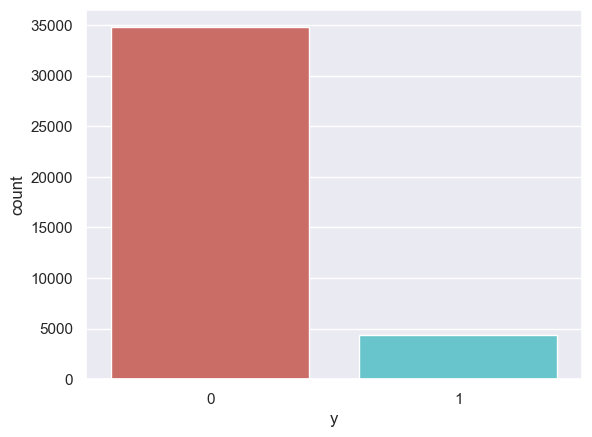

In [102]:
sns.countplot(x='y', data=train_data, palette = 'hls')
plt.show()

In [103]:
subscribed = train_data[train_data['y'] == 1].sample(n= 4415)
non_subscribed = train_data[train_data['y'] == 0].sample(n= 7000)
new_dataset = pd.concat([subscribed, non_subscribed], axis=0)
new_dataset.shape

(11415, 21)

In [104]:
new_dataset.isna().sum()

age                  0
job                 98
marital             22
education          525
default           1987
housing            263
loan               263
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [105]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11415 entries, 20651 to 29966
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11415 non-null  int64  
 1   job             11317 non-null  object 
 2   marital         11393 non-null  object 
 3   education       10890 non-null  object 
 4   default         9428 non-null   object 
 5   housing         11152 non-null  object 
 6   loan            11152 non-null  object 
 7   contact         11415 non-null  object 
 8   month           11415 non-null  object 
 9   day_of_week     11415 non-null  object 
 10  duration        11415 non-null  int64  
 11  campaign        11415 non-null  int64  
 12  pdays           11415 non-null  int64  
 13  previous        11415 non-null  int64  
 14  poutcome        11415 non-null  object 
 15  emp.var.rate    11415 non-null  float64
 16  cons.price.idx  11415 non-null  float64
 17  cons.conf.idx   11415 non-null  

In [106]:
new_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,11415.000000,11415.000000,11415.000000,11415.000000,11415.000000,11415.000000,11415.000000,11415.000000,11415.000000,11415.000000,11415.000000
mean,40.140955,346.465265,2.385896,909.652913,0.276566,-0.331695,93.504532,-40.283679,3.148963,5144.263145,0.386772
std,11.466288,333.063724,2.459789,284.173442,0.657736,1.694567,0.616116,5.160554,1.868796,84.225484,0.487032
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,129.000000,1.000000,999.000000,0.000000,-1.800000,92.963000,-42.700000,1.266000,5099.100000,0.000000
50%,38.000000,234.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.153000,5191.000000,0.000000
75%,47.000000,452.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.960000,5228.100000,1.000000
max,98.000000,4199.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [107]:
int_col=train_data.select_dtypes('int').columns
cat_col=train_data.select_dtypes('object').columns

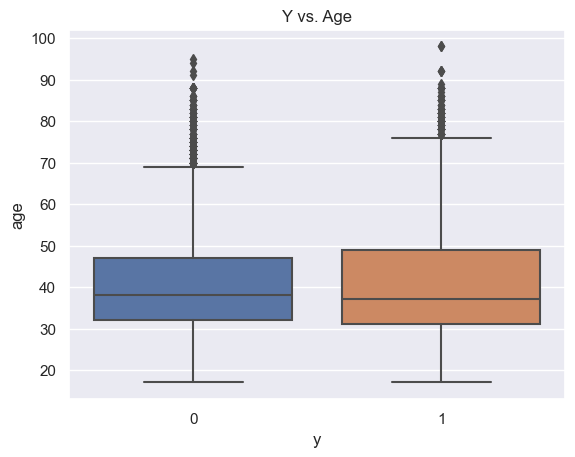

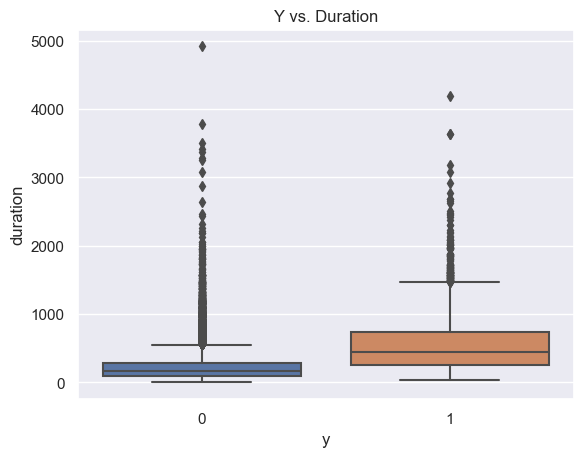

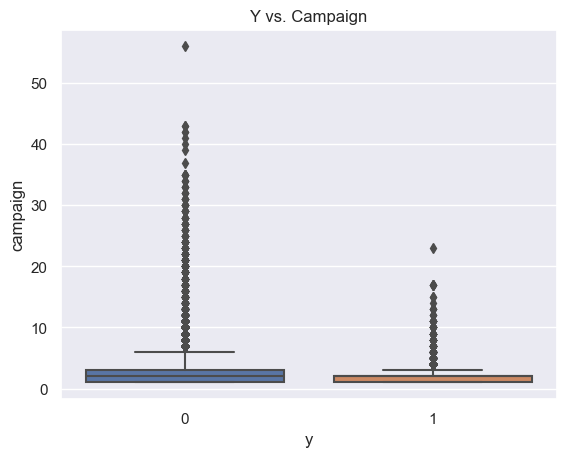

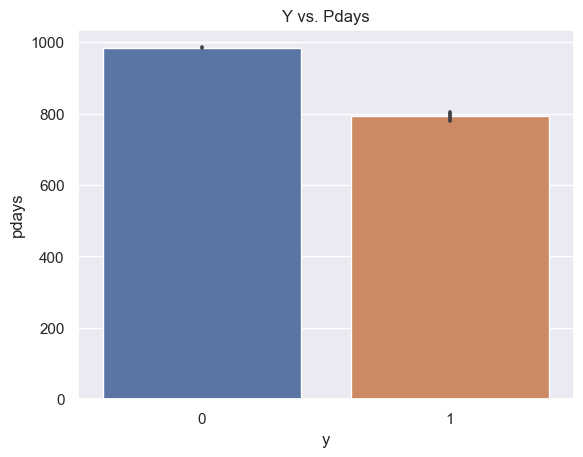

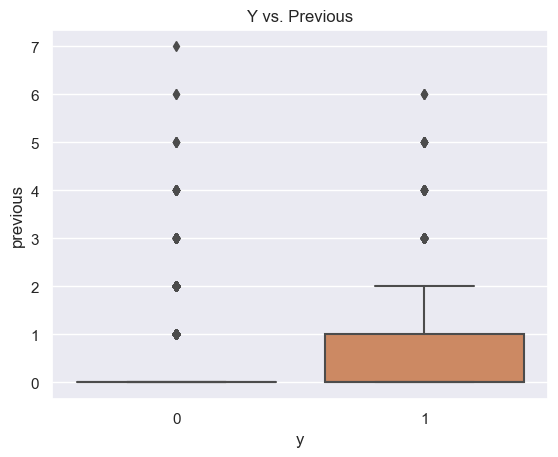

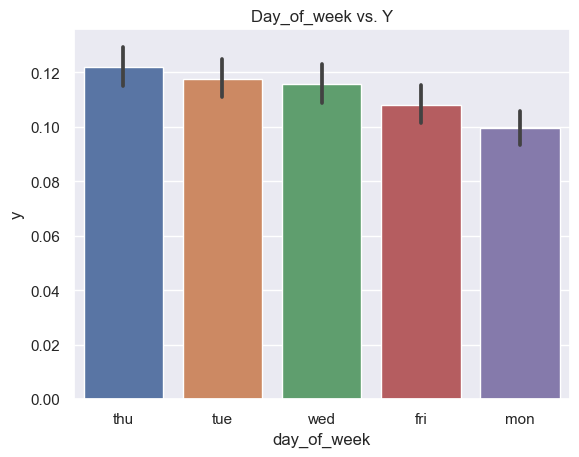

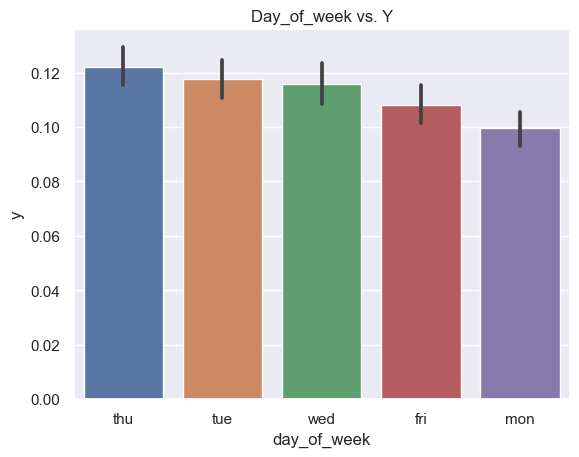

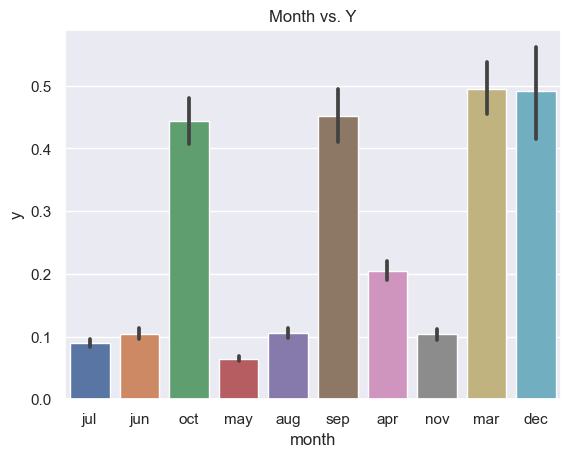

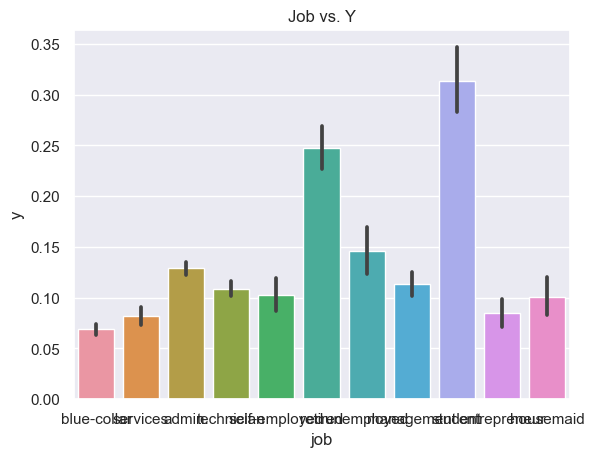

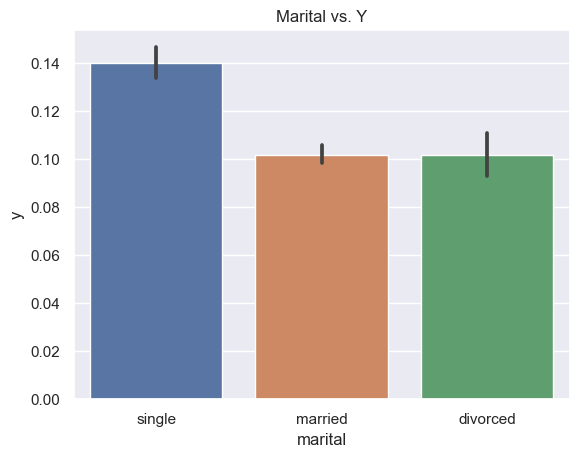

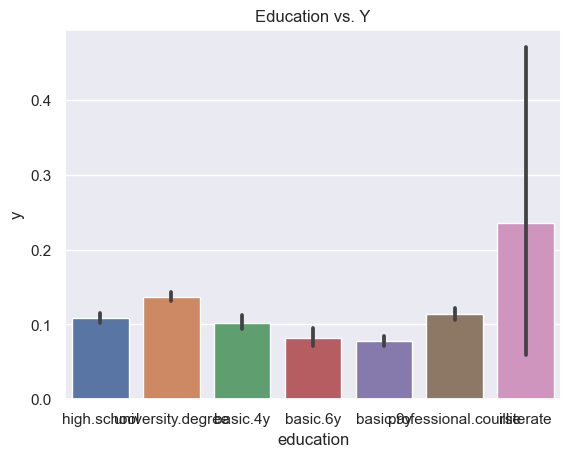

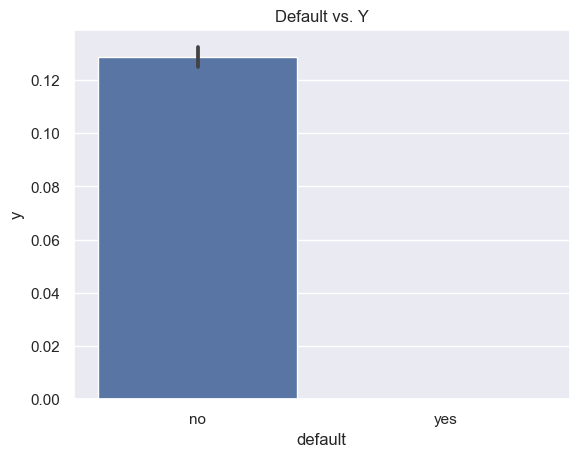

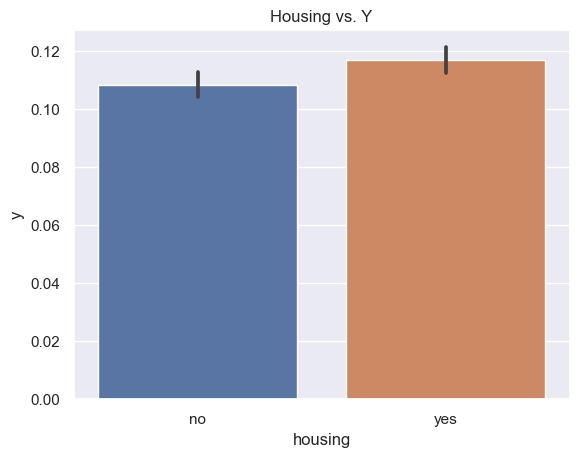

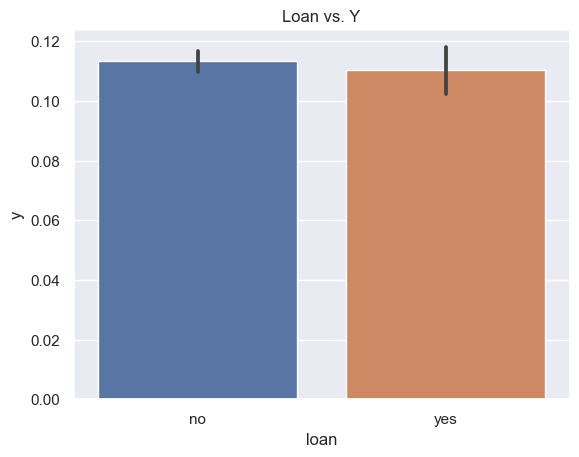

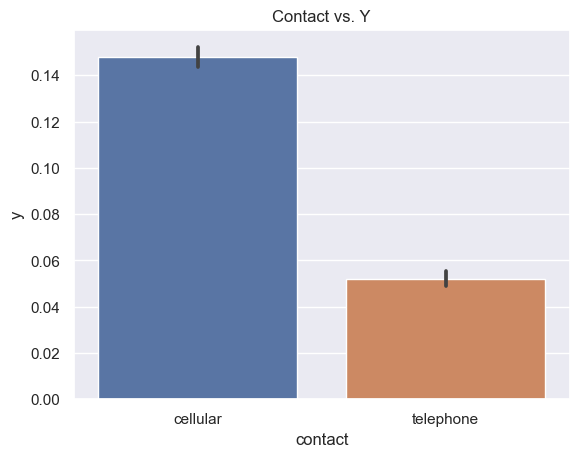

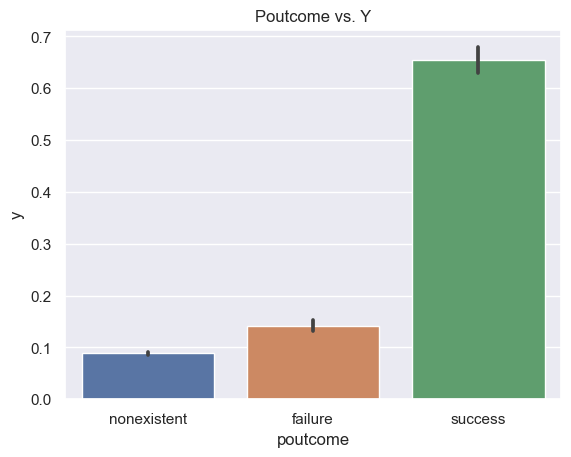

In [108]:
class RelationshipPlotter:
    
    def __init__(self, data):
        self.data = data
    
    def plot(self, x, y, plot_type):
        if plot_type == 'boxplot':
            sns.boxplot(data=self.data, x=x, y=y)
        elif plot_type == 'barplot':
            sns.barplot(data=self.data, x=x, y=y)
        plt.title(f"{x.capitalize()} vs. {y.capitalize()}")
        plt.show()

plotter = RelationshipPlotter(data=train_data)

# Plot the relationships between 
plotter.plot(x='y', y='age', plot_type='boxplot')
plotter.plot(x='y', y='duration', plot_type='boxplot')
plotter.plot(x='y', y='campaign', plot_type='boxplot')
plotter.plot(x='y', y='pdays', plot_type='barplot')
plotter.plot(x='y', y='previous', plot_type='boxplot')
plotter.plot(x='day_of_week', y='y', plot_type='barplot')
plotter.plot(x='day_of_week', y='y', plot_type='barplot')
plotter.plot(x='month', y='y', plot_type='barplot')
plotter.plot(x='job', y='y', plot_type='barplot')
plotter.plot(x='marital', y='y', plot_type='barplot')
plotter.plot(x='education', y='y', plot_type='barplot')
plotter.plot(x='default', y='y', plot_type='barplot')
plotter.plot(x='housing', y='y', plot_type='barplot')
plotter.plot(x='loan', y='y', plot_type='barplot')
plotter.plot(x='contact', y='y', plot_type='barplot')
plotter.plot(x='poutcome', y='y', plot_type='barplot')


In [109]:
x= new_dataset.drop(columns='y')
y= new_dataset['y']
X_train, X_val, y_train, y_val=train_test_split(x,y, shuffle=True, random_state=12, test_size=0.1)


In [110]:
list_features_isna=['job','marital','education','default','housing','loan']

def most_frequent(df, cols, target):
    list_of_most_frequent={}
    for col in list_features_isna:
        f = df.groupby(target)[col].apply(lambda x: x.mode().iloc[0])
        list_of_most_frequent[col]= f
    return pd.DataFrame(list_of_most_frequent)

most_frequent(X_train, list_features_isna, y)

,job,marital,education,default,housing,loan
y,,,,,,
0,admin.,married,university.degree,no,yes,no
1,admin.,married,university.degree,no,yes,no


In [111]:
most_frequent(X_val, list_features_isna, y)

,job,marital,education,default,housing,loan
y,,,,,,
0,admin.,married,university.degree,no,yes,no
1,admin.,married,university.degree,no,yes,no


In [112]:
list_features_isna=['job','marital','education','default','housing','loan']

def manage_missvalues(df,cols):
    
    for col in cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df

X_train = manage_missvalues(X_train, list_features_isna)
X_val = manage_missvalues(X_val, list_features_isna)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [113]:
def encode_binary_cate(df):
    dic_={
        'yes': 1,
        'no': 0   
    }
    
    for col in ['default','housing','loan']:
        df[col]=df[col].map(dic_)
    return df

X_train = encode_binary_cate(X_train)
X_val = encode_binary_cate(X_val)



def encode_categorical_features(df):

    for col in ['job','marital','education','contact','month','day_of_week','poutcome']:
        dummies = pd.get_dummies(df[col], dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(labels=col, axis=1)
        
    return df

# Encode the categorical features in the training and test sets
X_train = encode_categorical_features(X_train)
X_val = encode_categorical_features(X_val)


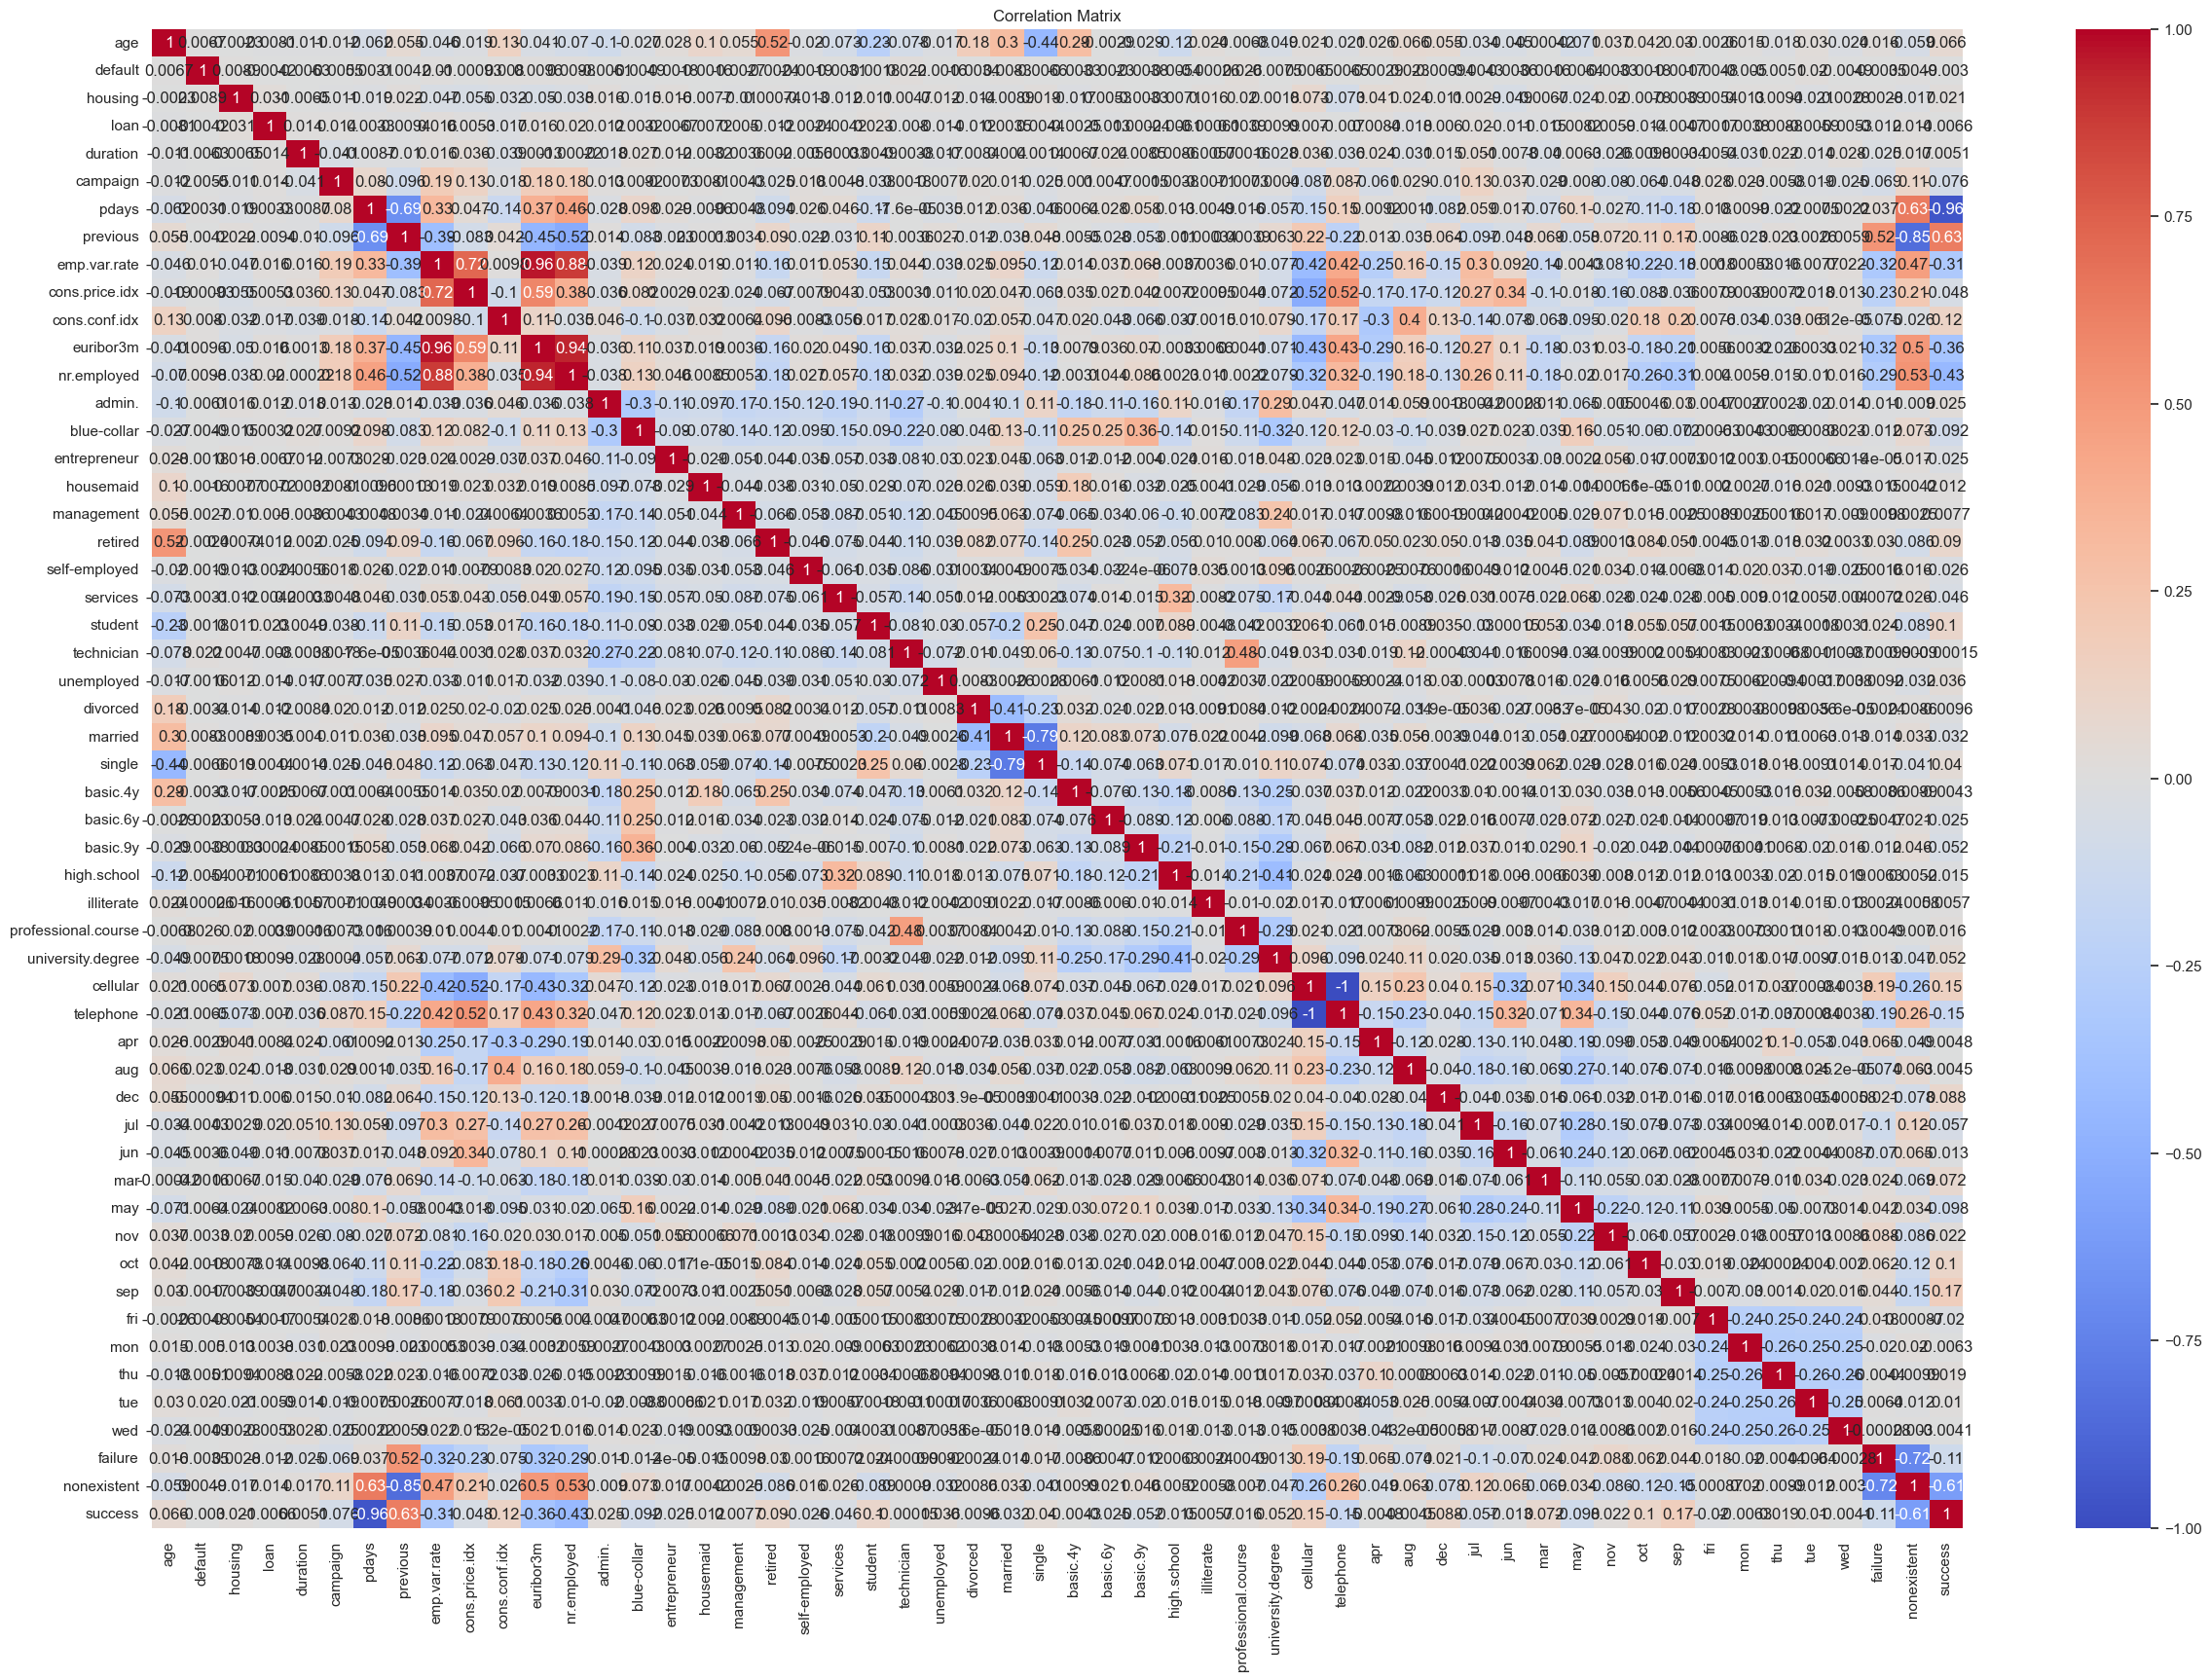

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = X_train.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [115]:
# Scale the dataset using StandardScaler
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)

In [116]:
from sklearn.model_selection import GridSearchCV

# Define a list of classifiers to use
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier()
]


# Define a parameter grid for each classifier
param_grids = [
    {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    {'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10]},
    {'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'max_features': [2, 3, 4]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    {'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
]

# Perform a grid search for each classifier
for i, clf in enumerate(classifiers):
    grid_search = GridSearchCV(clf, param_grid=param_grids[i], scoring='accuracy', cv=5)
    grid_search.fit(scaled_x_train, y_train)
    print(f"Best parameters for classifier {i}: {grid_search.best_params_}")
    print(f"Training accuracy for classifier {i}: {grid_search.best_score_}")
    print(f"Test accuracy for classifier {i}: {grid_search.score(scaled_x_val, y_val)}")
    


Best parameters for classifier 0: {'C': 0.1, 'penalty': 'l2'}
Training accuracy for classifier 0: 0.8647915052701156
Test accuracy for classifier 0: 0.850262697022767
Best parameters for classifier 1: {'max_depth': 5, 'min_samples_split': 5}
Training accuracy for classifier 1: 0.863331651255517
Test accuracy for classifier 1: 0.8546409807355516
Best parameters for classifier 2: {'max_depth': 5, 'max_features': 4, 'min_samples_split': 5}
Training accuracy for classifier 2: 0.7924659971523134
Test accuracy for classifier 2: 0.7933450087565674
Best parameters for classifier 3: {'learning_rate': 1, 'n_estimators': 200}
Training accuracy for classifier 3: 0.8706311108584046
Test accuracy for classifier 3: 0.8581436077057794
Best parameters for classifier 4: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Training accuracy for classifier 4: 0.8867903349230153
Test accuracy for classifier 4: 0.8765323992994746
Best parameters for classifier 5: {'n_neighbor

In [119]:
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(penalty='l2', C=0.1, random_state=42),
    DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42),
    RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features=4, random_state=42),
    SVC(kernel='rbf', C=0.1, gamma=0.01, random_state=42, probability=True),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42), n_estimators=200, learning_rate=1, random_state=42),
    GradientBoostingClassifier(n_estimators=100, max_depth=5, min_samples_split=10, learning_rate=0.1, random_state=42),
    KNeighborsClassifier(n_neighbors=7, weights='distance', p=1)
]

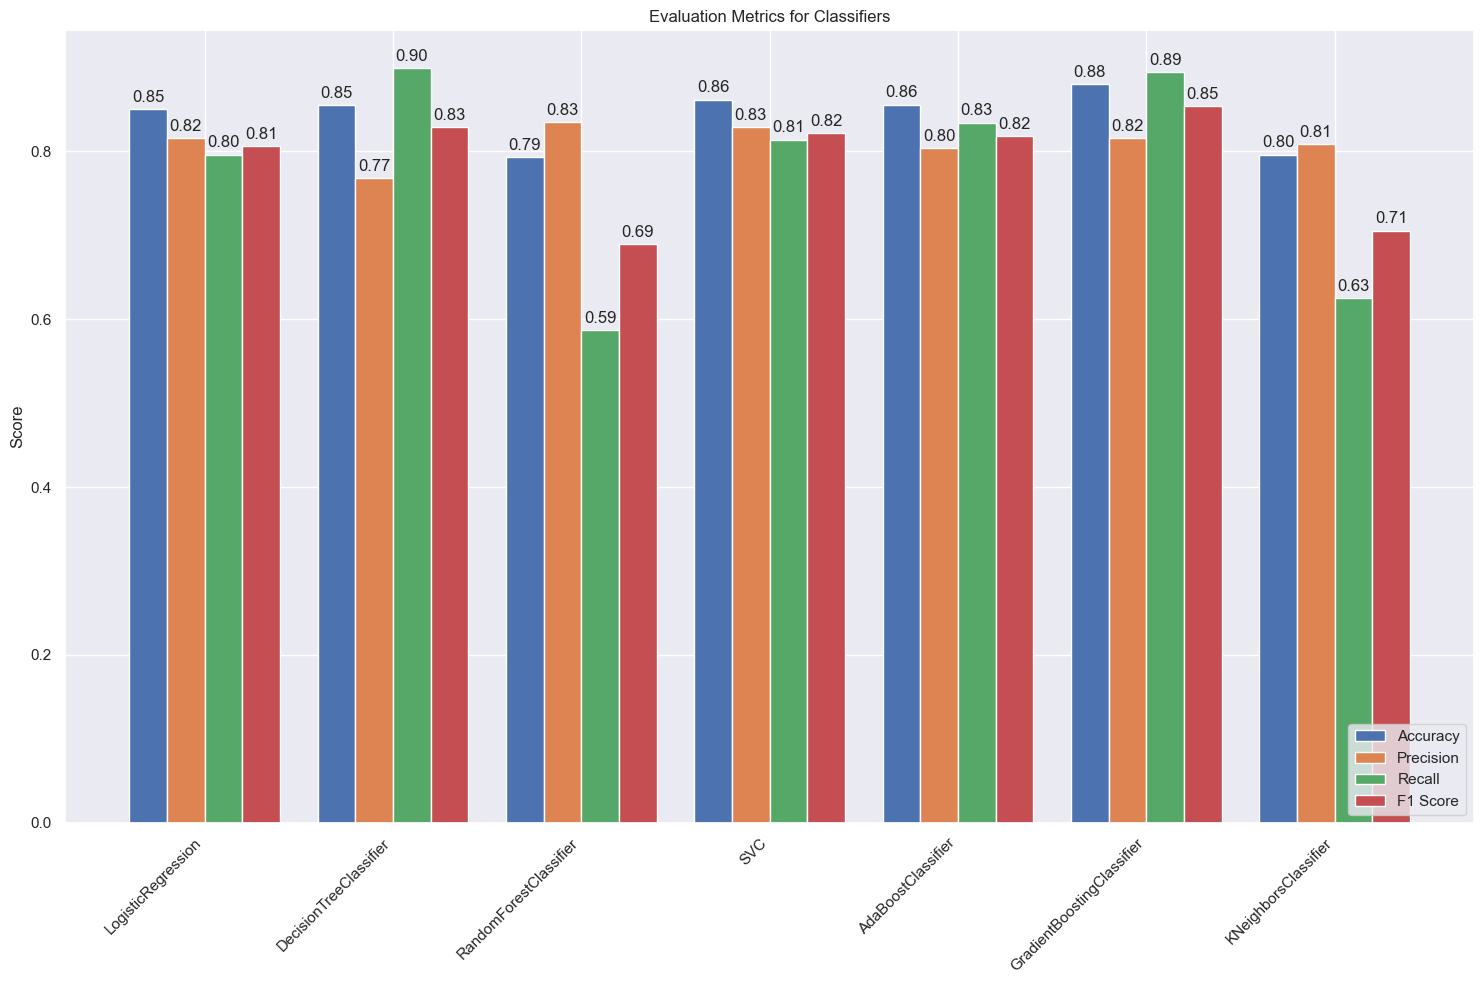

In [121]:
# Initialize empty lists to store the evaluation metrics
classifier_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Loop through each classifier and fit it to the training data
for classifier in classifiers:
    classifier.fit(scaled_x_train, y_train)
    y_pred = classifier.predict(scaled_x_val)
    
    # Get the name of the classifier
    classifier_name = type(classifier).__name__
    
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Append the evaluation metrics to the lists
    classifier_names.append(classifier_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Create a bar plot that shows all the evaluation metrics for each classifier
x = np.arange(len(classifier_names))
width = 0.2
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precisions, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recalls, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

# Add some text for labels, title and legend
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics for Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(classifier_names, rotation=45, ha="right")
ax.legend(loc='lower right')

# Add the metric score values above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()

# Display the plot
plt.show()

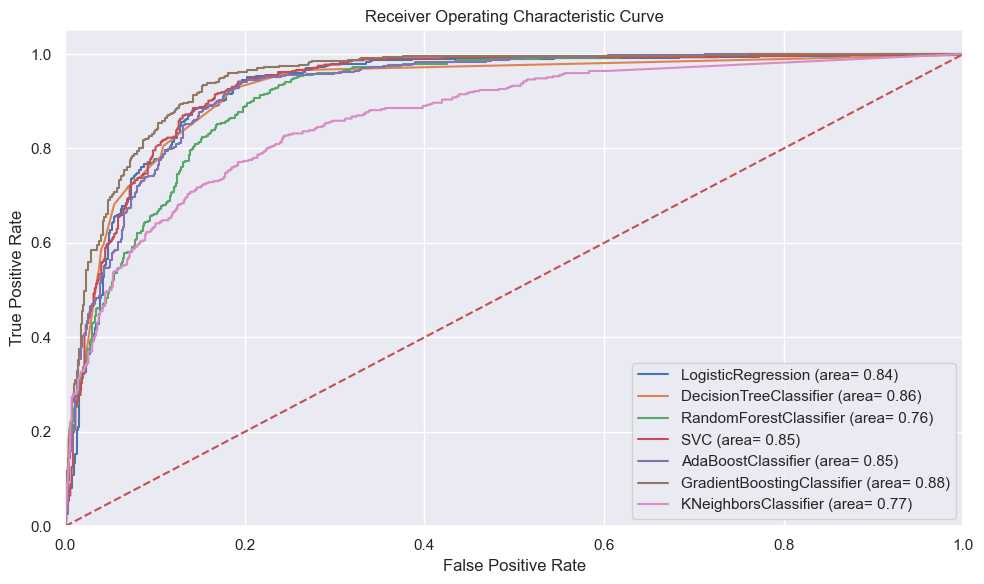

In [122]:
# Receiver Operating Characteristic Curve'
fig, ax = plt.subplots(figsize=(10, 6))

for classifier in classifiers:
    classifier.fit(scaled_x_train, y_train)
    y_pred = classifier.predict(scaled_x_val)
    
    roc_auc = roc_auc_score(y_val, classifier.predict(scaled_x_val))
    fpr, tpr, thresholds = roc_curve(y_val, classifier.predict_proba(scaled_x_val)[:,1])

    sns.set_style('darkgrid')
    ax.plot(fpr, tpr, label=f'{type(classifier).__name__} (area= {roc_auc:.2f})')


ax.plot([0, 1], [0, 1],'r--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic Curve')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()